(0, 1)

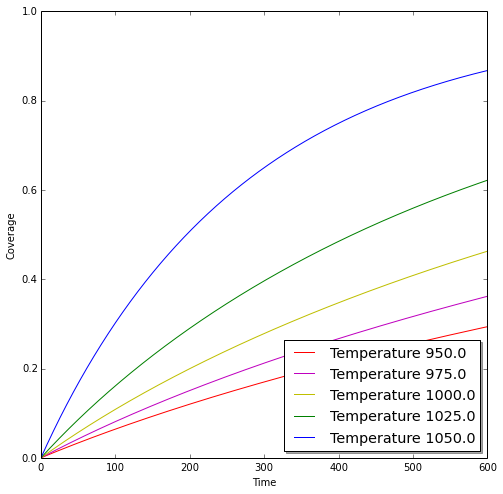

In [10]:
from __future__ import division
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import math
from scipy.integrate import odeint
from math import exp

T_s = np.linspace(950, 1050, 5) + 273
# T = [1223, 1273, 1323]
Ea = 3        # activation energy eV for active carbon 
e = 1.60217662e-19 
k = 1.38064852e-23
# T0 = Ts[-1]
C0 = 0.0     # initial coverage
Ceq_s = [0.9, 0.92, 0.94, 0.96, 0.98]     # equilibrium coverage
phi = 0.1                  # sigma bond 
# alpha = exp(e*Ea/k/T0)*(-3*Ce*e*phi/k/T0 + math.log(Ce/(1-Ce)))
k_n = 1.0
gamma = 1e-3               # frequency factor


def f(y, t, params):
    C = y      # unpack current values of y
    phi, gamma, Ce, k_n, n, T = params  # unpack parameters
    derivs = gamma*exp(k_n*n*exp(-e*Ea/k/T))*(1-C) - gamma*exp(-3*C*e*phi/k/T)*C
    return derivs

coverage = {}
tStop = 600.
tInc = 0.1
# Make time array for solution
t = np.arange(0., tStop, tInc)
# Bundle initial conditions for ODE solver
y0 = [C0]
for T,Ce in zip(T_s, Ceq_s):
    # Bundle parameters for ODE solver
    n = exp(e*Ea/k/T) * (-3*Ce*e*phi/k/T + math.log(Ce/(1-Ce)))
    params = [phi, gamma, Ce, k_n, n, T]
    # Call the ODE solver
    coverage[T] = odeint(f, y0, t, args=(params,))
    
# Plot results
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(t, coverage[T_s[0]][:], 'r-', label='Temperature %s'%(T_s[0]-273))
ax.plot(t, coverage[T_s[1]][:], 'm-', label='Temperature %s'%(T_s[1]-273))
ax.plot(t, coverage[T_s[2]][:], 'y-', label='Temperature %s'%(T_s[2]-273))
ax.plot(t, coverage[T_s[3]][:], 'g-', label='Temperature %s'%(T_s[3]-273))
ax.plot(t, coverage[T_s[4]][:], 'b-', label='Temperature %s'%(T_s[4]-273))
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('Coverage')
plt.xlabel('Time')
plt.ylim([0,1])

(0, 1)

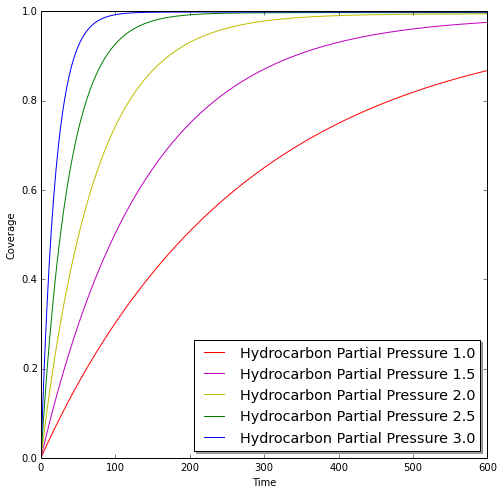

In [12]:
from __future__ import division
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import math
from scipy.integrate import odeint
from math import exp

# T_s = np.linspace(950, 1050, 5) + 273
T = 1050+273
Ea = 3        # activation energy eV for active carbon 
e = 1.60217662e-19 
k = 1.38064852e-23
C0 = 0.0     # initial coverage
# Ceq_s = [0.9, 0.92, 0.94, 0.96, 0.98]     # equilibrium coverage
Ceq = 0.98
# #################
# phi needs to be smaller than a threshold 0.13
# import math 
# C = 0.98
# T = 900+273
# e = 1.60217662e-19
# k*T/e/3/C * math.log(C/(1-C))
# ###################
phi = 0.1                  # sigma bond 
# alpha = exp(e*Ea/k/T0)*(-3*Ce*e*phi/k/T0 + math.log(Ce/(1-Ce)))
k_n_s = [1.0, 1.5, 2.0, 2.5, 3.0]
gamma = 1e-3               # frequency factor


def f(y, t, params):
    C = y      # unpack current values of y
    phi, gamma, Ce, k_n, n, T = params  # unpack parameters
    derivs = gamma*exp(k_n*n*exp(-e*Ea/k/T))*(1-C) - gamma*exp(-3*C*e*phi/k/T)*C
    return derivs

coverage = {}
tStop = 600.
tInc = 1
# Make time array for solution
t = np.arange(0., tStop, tInc)
# Bundle initial conditions for ODE solver
y0 = [C0]
for k_n in k_n_s:
    # Bundle parameters for ODE solver
    n = exp(e*Ea/k/T) * (-3*Ce*e*phi/k/T + math.log(Ce/(1-Ce)))
    params = [phi, gamma, Ce, k_n, n, T]
    # Call the ODE solver
    coverage[k_n] = odeint(f, y0, t, args=(params,))
    
# Plot results
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(t, coverage[k_n_s[0]][:], 'r-', label='Hydrocarbon Partial Pressure %s'%(k_n_s[0]))
ax.plot(t, coverage[k_n_s[1]][:], 'm-', label='Hydrocarbon Partial Pressure %s'%(k_n_s[1]))
ax.plot(t, coverage[k_n_s[2]][:], 'y-', label='Hydrocarbon Partial Pressure %s'%(k_n_s[2]))
ax.plot(t, coverage[k_n_s[3]][:], 'g-', label='Hydrocarbon Partial Pressure %s'%(k_n_s[3]))
ax.plot(t, coverage[k_n_s[4]][:], 'b-', label='Hydrocarbon Partial Pressure %s'%(k_n_s[4]))
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('Coverage')
plt.xlabel('Time')
plt.ylim([0,1])

In [3]:
import math 
C = 0.98
T = 900+273
e = 1.60217662e-19
k*T/e/3/C * math.log(C/(1-C))

0.13380618923686743